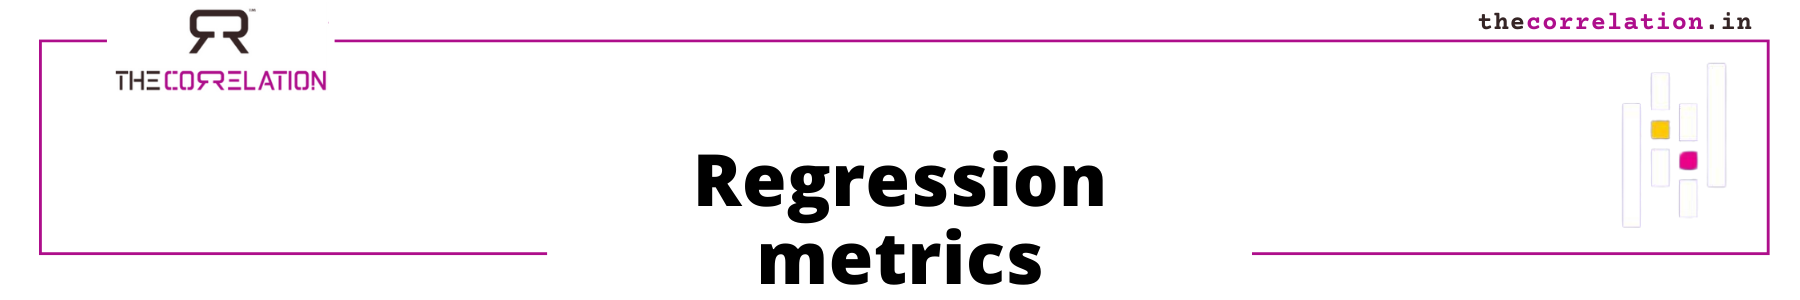

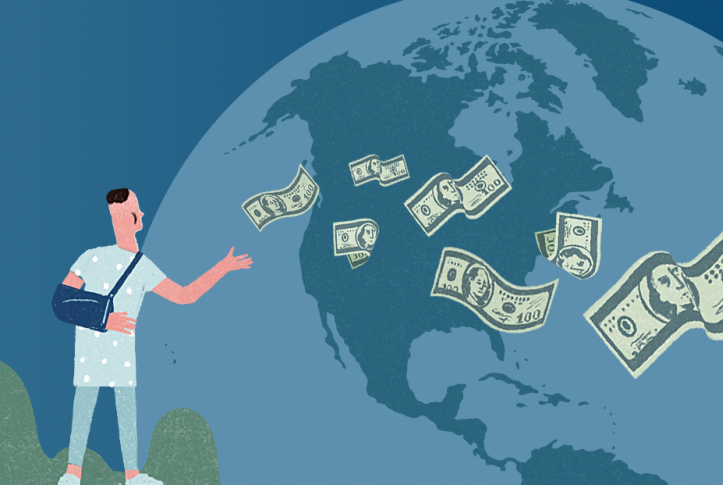

# 0 Recap

In [ ]:
'''
1. Intro
2. Prob Statement
3. Libs - basics
4. Data Acq
5. Pre profiling
6. Pre procesing
7. Post profiling
8. EDA - business undesrtanding
9. XY split
10. train test val split
11. cont and cat split
12. Scaling and Encoding - import, object, .fit(), .transform()
13. Combine - OHE and ScalledData
14. EDA2 - Assumtion check and correction
15. ML - 4 steps - import, object, .fit(), .predict()
16. ERROR/ACCURACE
17. summary

'''

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Business-Understanding" data-toc-modified-id="Business-Understanding-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Business Understanding</a></span></li><li><span><a href="#Importing-Libraries" data-toc-modified-id="Importing-Libraries-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Importing Libraries</a></span></li><li><span><a href="#About-Dataset" data-toc-modified-id="About-Dataset-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>About Dataset</a></span></li><li><span><a href="#Reading-Dataset" data-toc-modified-id="Reading-Dataset-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Reading Dataset</a></span></li><li><span><a href="#Splitting-the-dataset" data-toc-modified-id="Splitting-the-dataset-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Splitting the dataset</a></span></li><li><span><a href="#Train-Test-split" data-toc-modified-id="Train-Test-split-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Train Test split</a></span></li><li><span><a href="#Dealing-with-Categorical-Variable" data-toc-modified-id="Dealing-with-Categorical-Variable-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Dealing with Categorical Variable</a></span></li><li><span><a href="#Dealing-with-Continous-Data" data-toc-modified-id="Dealing-with-Continous-Data-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Dealing with Continous Data</a></span></li><li><span><a href="#ML-Modelling" data-toc-modified-id="ML-Modelling-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>ML Modelling</a></span></li><li><span><a href="#Regression-Metrices" data-toc-modified-id="Regression-Metrices-10"><span class="toc-item-num">10&nbsp;&nbsp;</span>Regression Metrices</a></span><ul class="toc-item"><li><span><a href="#Mean-Absolute--Error" data-toc-modified-id="Mean-Absolute--Error-10.1"><span class="toc-item-num">10.1&nbsp;&nbsp;</span>Mean Absolute  Error</a></span></li><li><span><a href="#Mean-Squared-Error" data-toc-modified-id="Mean-Squared-Error-10.2"><span class="toc-item-num">10.2&nbsp;&nbsp;</span>Mean Squared Error</a></span></li><li><span><a href="#Root-Mean-Squared-Error" data-toc-modified-id="Root-Mean-Squared-Error-10.3"><span class="toc-item-num">10.3&nbsp;&nbsp;</span>Root Mean Squared Error</a></span></li><li><span><a href="#R-square" data-toc-modified-id="R-square-10.4"><span class="toc-item-num">10.4&nbsp;&nbsp;</span>R square</a></span></li><li><span><a href="#Adjusted-R-square" data-toc-modified-id="Adjusted-R-square-10.5"><span class="toc-item-num">10.5&nbsp;&nbsp;</span>Adjusted R square</a></span></li></ul></li></ul></div>

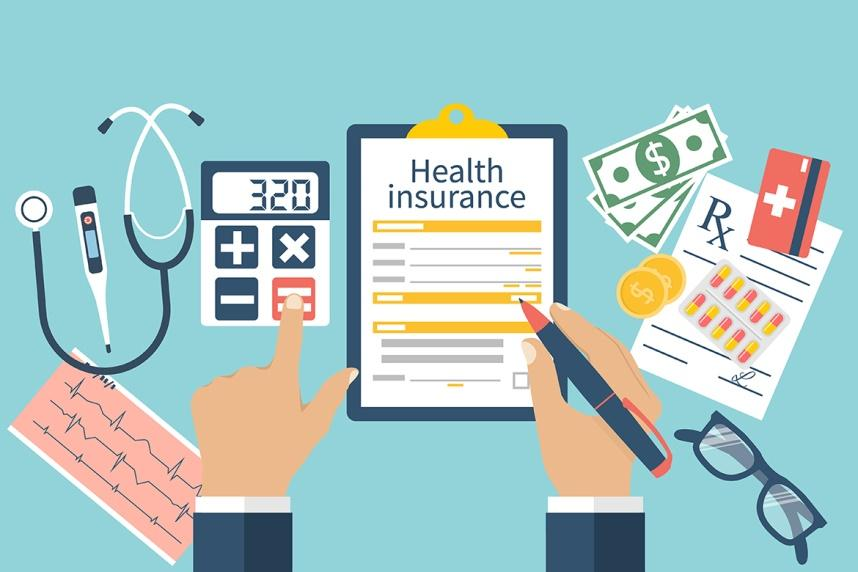

# Business Understanding 

Can you accurately predict insurance costs?

# Importing Libraries

In [1]:
#-------------------------------------------------------------------------------------------------------------------------------
import pandas as pd                                                 # Importing for panel data analysis                      
pd.set_option('display.max_columns', None)                          # Unfolding hidden features if the cardinality is high
pd.set_option('display.max_colwidth', None)                         # Unfolding the max feature width for better clearity
pd.set_option('display.max_rows', None)                             # Unfolding hidden data points if the cardinality is high
pd.set_option('mode.chained_assignment', None)                      # Removing restriction over chained assignments operations
#-------------------------------------------------------------------------------------------------------------------------------
import numpy as np                                                  # For numerical python operations
#-------------------------------------------------------------------------------------------------------------------------------
from matplotlib import pyplot as plt                                # To use matplotlib's pyplot interface
import seaborn as sns                                               # For attractive visualization
%matplotlib inline
#-------------------------------------------------------------------------------------------------------------------------------
import warnings                                                     # Importing warning to disable runtime warnings
warnings.filterwarnings("ignore")                                   # Warnings will appear only once
#-------------------------------------------------------------------------------------------------------------------------------

# About Dataset

- age: age of primary beneficiary

- sex: insurance contractor gender, female, male

- bmi: Body mass index, providing an understanding of body, weights that are relatively high or low relative to height,
  objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9

- children: Number of children covered by health insurance / Number of dependents

- smoker: Smoking

- region: the beneficiary's residential area in the US, northeast, southeast, southwest, northwest.

- charges: Individual medical costs billed by health insurance

# Reading Dataset

In [2]:
medical_cost_df = pd.read_csv('https://raw.githubusercontent.com/TheCorrelation/Datasets/main/insurance.csv')

In [3]:
medical_cost_df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
medical_cost_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [5]:
medical_cost_df.nunique()

age           47
sex            2
bmi          548
children       6
smoker         2
region         4
charges     1337
dtype: int64

In [6]:
medical_cost_df['region'].value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

In [7]:
medical_cost_df.shape

(1338, 7)

In [8]:
'''
1. No missing values
2. No issue with data types
'''

'\n1. No missing values\n2. No issue with data types\n'

In [9]:
medical_cost_df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [10]:
medical_cost_df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [11]:
medical_cost_df['age'] = np.log(medical_cost_df['age'])

In [12]:
medical_cost_df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,3.597222,30.663397,1.094918,13270.422265
std,0.390621,6.098187,1.205493,12110.011237
min,2.890372,15.960000,0.000000,1121.873900
25%,3.295837,26.296250,0.000000,4740.287150
50%,3.663562,30.400000,1.000000,9382.033000
75%,3.931826,34.693750,2.000000,16639.912515
max,4.158883,53.130000,5.000000,63770.428010


In [13]:
medical_cost_df['bmi'] = np.log(medical_cost_df['bmi'])

# Splitting the dataset

In [14]:
#Now will split our dataset into Dependent variable and Independent variable
Y = medical_cost_df['charges']
X = medical_cost_df.drop(columns='charges')

#  Train Test split

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test  = train_test_split(X,Y,test_size=0.2,random_state = 42)
print(f"Shape of X_train = {X_train.shape}")
print(f"Shape of X_test = {X_test.shape}")
print(f"Shape of y_train = {y_train.shape}")
print(f"Shape of y_test = {y_test.shape}")

Shape of X_train = (1070, 6)
Shape of X_test = (268, 6)
Shape of y_train = (1070,)
Shape of y_test = (268,)


In [16]:
X_train.head()

,age,sex,bmi,children,smoker,region
560,3.828641,female,2.993229,2,no,northwest
1285,3.850148,female,3.191299,0,no,northeast
1142,3.951244,female,3.213260,0,no,southeast
969,3.663562,female,3.535728,5,no,southeast
486,3.988984,female,3.066657,3,no,northwest


In [17]:
X_train_cat = X_train[['sex','smoker','region']]
X_train_cont = X_train[['age','bmi','children']]

In [18]:
X_test_cat = X_test[['sex','smoker','region']]
X_test_cont = X_test[['age','bmi','children']]

In [19]:
print(f"Shape of X_train_cat : {X_train_cat.shape}")
print(f"Shape of X_train_cont : {X_train_cont.shape}")
print(f"Shape of X_train_cat : {X_test_cat.shape}")
print(f"Shape of X_train_cont : {X_test_cont.shape}")

Shape of X_train_cat : (1070, 3)
Shape of X_train_cont : (1070, 3)
Shape of X_train_cat : (268, 3)
Shape of X_train_cont : (268, 3)


# Dealing with Categorical Variable

In [20]:
from sklearn.preprocessing import OneHotEncoder
drop_enc = OneHotEncoder(drop='first', sparse = False)
drop_enc.fit(X_train_cat)

OneHotEncoder(drop='first', sparse=False)

In [21]:
drop_enc.categories_

[array(['female', 'male'], dtype=object),
 array(['no', 'yes'], dtype=object),
 array(['northeast', 'northwest', 'southeast', 'southwest'], dtype=object)]

In [22]:
drop_enc.get_feature_names(X_train_cat.columns)

array(['sex_male', 'smoker_yes', 'region_northwest', 'region_southeast',
       'region_southwest'], dtype=object)

In [23]:
X_train_OHE = drop_enc.transform(X_train_cat)
X_test_OHE = drop_enc.transform(X_test_cat)

In [24]:
X_train_OHE_DF = pd.DataFrame(X_train_OHE, columns = drop_enc.get_feature_names(X_train_cat.columns), index = X_train_cat.index)
X_test_OHE_DF = pd.DataFrame(X_test_OHE, columns = drop_enc.get_feature_names(X_train_cat.columns), index = X_test_cat.index)

In [25]:
X_train_OHE_DF.head()

,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
560,0.0,0.0,1.0,0.0,0.0
1285,0.0,0.0,0.0,0.0,0.0
1142,0.0,0.0,0.0,1.0,0.0
969,0.0,0.0,0.0,1.0,0.0
486,0.0,0.0,1.0,0.0,0.0


# Dealing with Continous Data

In [26]:
from sklearn.preprocessing import StandardScaler
scaler  = StandardScaler()
scaler.fit(X_train_cont)

StandardScaler()

In [27]:
X_train_S = scaler.transform(X_train_cont)
X_test_S = scaler.transform(X_test_cont)

In [28]:
X_train_S_DF = pd.DataFrame(X_train_S, columns = (X_train_cont.columns + '_S'), index = X_train_cont.index)
X_test_S_DF = pd.DataFrame(X_test_S, columns = (X_train_cont.columns + '_S'), index = X_test_cont.index)

In [29]:
X_test_S_DF.head()

,age_S,bmi_S,children_S
764,0.525290,-0.864464,0.734336
887,-0.044109,0.010216,-0.911192
890,1.424058,-0.537888,-0.911192
1293,0.581374,-0.753203,1.557100
259,-1.674860,0.315184,-0.911192


In [30]:
#combining cat and cont data in train and test respectively

X_train_comb = pd.concat([X_train_OHE_DF,X_train_S_DF],axis = 1)
X_test_comb = pd.concat([X_test_OHE_DF,X_test_S_DF],axis = 1)

# Assumption Check

In [31]:
X_train_comb.columns

Index(['sex_male', 'smoker_yes', 'region_northwest', 'region_southeast',
       'region_southwest', 'age_S', 'bmi_S', 'children_S'],
      dtype='object')

<AxesSubplot:ylabel='Density'>

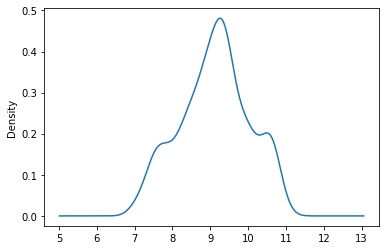

In [32]:
# Normality

np.log(y_train).plot.kde()

In [33]:
# 2. Linearity

# 'age_S', 'bmi_S', 'children_S'

<AxesSubplot:xlabel='age_S', ylabel='charges'>

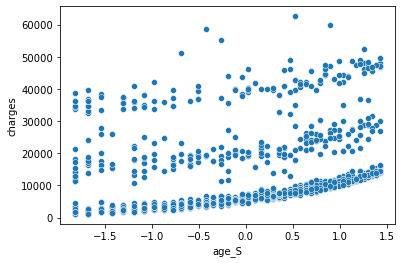

In [34]:
sns.scatterplot(x = X_train_comb['age_S'], y = y_train)

In [35]:
#X_train_comb['age_S_sqrt'] = np.sqrt(X_train_comb['age_S'])
#X_train_comb.drop('age_S', axis = 1, inplace = True)

<AxesSubplot:xlabel='bmi_S', ylabel='charges'>

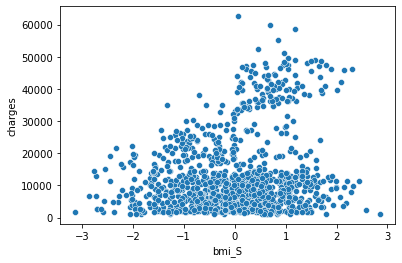

In [37]:
sns.scatterplot(x = X_train_comb['bmi_S'], y = y_train)

In [38]:
X_train_comb.drop('bmi_S', axis = 1, inplace = True)

<AxesSubplot:xlabel='children_S', ylabel='charges'>

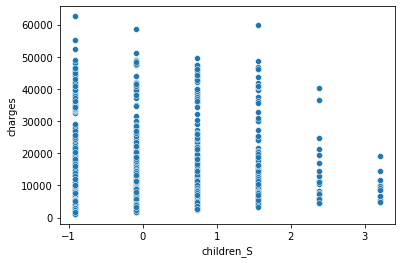

In [40]:
sns.scatterplot(x = X_train_comb['children_S'], y = y_train)

In [59]:
#X_test_comb['age_S_sqrt'] = np.sqrt(X_test_comb['age_S'])
#X_test_comb.drop(['age_S', 'bmi_S'], axis = 1, inplace = True)
X_train_comb.drop('age_S', axis = 1, inplace = True)

In [52]:
X_test_comb.head()

,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest,children_S
764,0.0,0.0,0.0,0.0,0.0,0.734336
887,0.0,0.0,1.0,0.0,0.0,-0.911192
890,0.0,1.0,1.0,0.0,0.0,-0.911192
1293,1.0,0.0,1.0,0.0,0.0,1.557100
259,1.0,1.0,1.0,0.0,0.0,-0.911192


In [53]:
X_train_comb.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1070 entries, 560 to 1126
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   sex_male          1070 non-null   float64
 1   smoker_yes        1070 non-null   float64
 2   region_northwest  1070 non-null   float64
 3   region_southeast  1070 non-null   float64
 4   region_southwest  1070 non-null   float64
 5   age_S             1070 non-null   float64
 6   children_S        1070 non-null   float64
dtypes: float64(7)
memory usage: 66.9 KB


<AxesSubplot:>

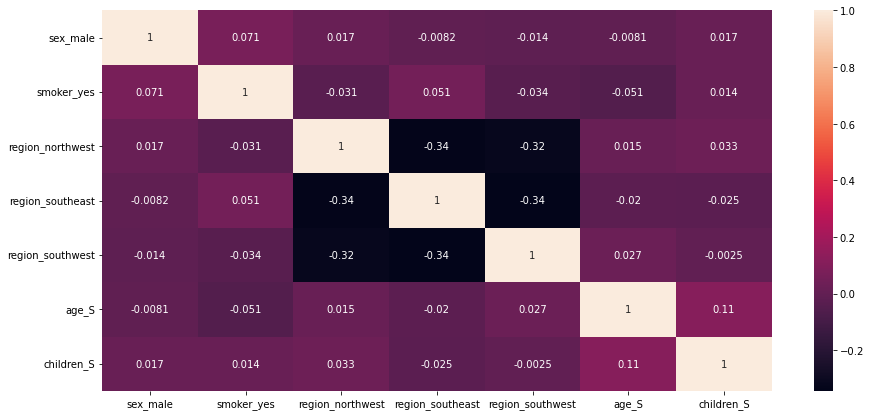

In [54]:
# 3.multico
paper = plt.figure(figsize = [15,7])
sns.heatmap(X_train_comb.corr(), annot = True)

# ML Modelling

In [60]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg.fit(X_train_comb, y_train)

LinearRegression()

In [61]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg.fit(X_test_comb, y_test)

LinearRegression()

In [62]:
y_train_pred = linreg.predict(X_train_comb)
y_test_pred = linreg.predict(X_test_comb)

# Regression Metrices

## Mean Absolute  Error

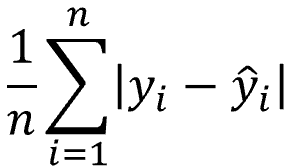

MAE is a very simple metric which calculates the absolute difference between actual and predicted values.

In [63]:
from sklearn.metrics import mean_absolute_error
print("MAE",mean_absolute_error(y_test,y_test_pred))

MAE 5349.862122794623


## Mean Squared Error

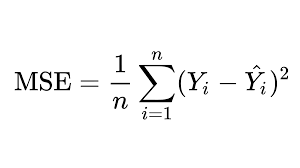

MSE is a most used and very simple metric with a little bit of change in mean absolute error. Mean squared error states that finding the squared difference between actual and predicted value.

So, above we are finding the absolute difference and here we are finding the squared difference.

What actually the MSE represents? It represents the squared distance between actual and predicted values. we perform squared to avoid the cancellation of negative terms and it is the benefit of MSE.

In [64]:
from sklearn.metrics import mean_squared_error
print("MSE",mean_squared_error(y_test,y_test_pred))

MSE 50336022.90296656


## Root Mean Squared Error

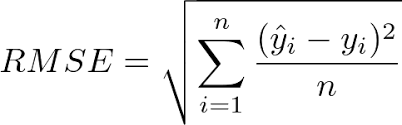

As RMSE is clear by the name itself, that it is a simple square root of mean squared error.

Root Mean Square Error (RMSE) is the standard deviation of the residuals (prediction errors). Residuals are a measure of how far from the regression line data points are; RMSE is a measure of how spread out these residuals are. In other words, it tells you how concentrated the data is around the line of best fit. Root mean square error is commonly used in climatology, forecasting, and regression analysis to verify experimental results.

In [65]:
print("RMSE",np.sqrt(mean_squared_error(y_test,y_test_pred)))

RMSE 7094.788432572642


## R square

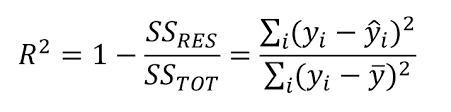

R-squared (R2) is a statistical measure that represents the proportion of the variance for a dependent variable that's explained by an independent variable or variables in a regression model. Whereas correlation explains the strength of the relationship between an independent and dependent variable, R-squared explains to what extent the variance of one variable explains the variance of the second variable

In [66]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test,y_test_pred)
print(r2)

0.675771760456324


## Adjusted R square

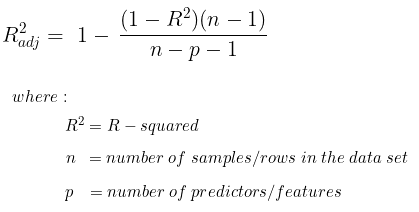

Adjusted R-squared is a modified version of R-squared that has been adjusted for the number of predictors in the model. The adjusted R-squared increases when the new term improves the model more than would be expected by chance. It decreases when a predictor improves the model by less than expected. Typically, the adjusted R-squared is positive, not negative. It is always lower than the R-squared.

In [67]:
n=df.shape[0]
p=1+df.shape[1]
adj_r2_score = 1 - ((1-r2)*(n-1)/(n-p-1))
print(adj_r2_score)

NameError: name 'df' is not defined